## Feature Selection with Mutual information Scores

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df= pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
s= df.isna().sum()
s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
# Here CAbin column have 687 null values but this column is importatnt for predicting survival
# so can not drop this column so we fill 'Constatnt --> unknown' 
# Here Age column have 177 null values and we can fill tht values by 'mean' or 'median'.

In [9]:
# Column 'Pclass' shows Passenger Class.
# column 'SibSp' shows no. of Siblings and Spouse.
# Column 'Parch' shows no. of PARENTS AND childrens.
# Column 'Ticket' shows Ticket no.
# Column 'Fare' gives Amount spend for tickets.
# Column 'Cabin' shows Cabin no.
# Here 'embarked' column cointains initials of city names from where passesgers started their journey.

### Seperate x and y

In [10]:
x= df.drop(columns=['PassengerId','Name','Ticket','Survived'])
y= df[['Survived']]

In [11]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


### Seperate Cat Con features

In [12]:
cat = x.columns[x.dtypes=='object']
con = x.columns[x.dtypes!='object']

In [13]:
cat

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')

In [14]:
con

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### Create a Pipelie for feature Selectiom

1. Ordinal Encodig : Categorical Features

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe= Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                          ('Scalar',StandardScaler())])

cat_pipe= Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                          ('Scaler',OrdinalEncoder())])

pre1= ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [17]:
x_pre= pre1.fit_transform(x)
x_pre

array([[ 8.27377244e-01, -5.65736461e-01,  4.32793366e-01, ...,
         1.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00,  6.63861032e-01,  4.32793366e-01, ...,
         0.00000000e+00,  8.10000000e+01,  0.00000000e+00],
       [ 8.27377244e-01, -2.58337088e-01, -4.74545196e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       ...,
       [ 8.27377244e-01, -1.04637401e-01,  4.32793366e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00, -2.58337088e-01, -4.74545196e-01, ...,
         1.00000000e+00,  6.00000000e+01,  0.00000000e+00],
       [ 8.27377244e-01,  2.02761972e-01, -4.74545196e-01, ...,
         1.00000000e+00,  1.47000000e+02,  1.00000000e+00]])

In [18]:
cols= pre1.get_feature_names_out()

In [19]:
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex', 'cat__Cabin', 'cat__Embarked'], dtype=object)

In [20]:
X_pre = pd.DataFrame(x_pre, columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex,cat__Cabin,cat__Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1.0,147.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,81.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,147.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,55.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1.0,147.0,2.0


### Calculating mutual information score

In [21]:
# Approach1 (Method 1) to select features
from sklearn.feature_selection import mutual_info_classif
mi= mutual_info_classif(X_pre,y,)
mi
# Mutual information measures the dependency between the variables.
# It is equal to zero if and only if two random variables are independent,
# and higher values mean higher dependency.


array([0.0353041 , 0.03778386, 0.02594589, 0.00532007, 0.12026108,
       0.14328449, 0.05693804, 0.0121262 ])

In [22]:
mi= pd.Series(mi)
mi


0    0.035304
1    0.037784
2    0.025946
3    0.005320
4    0.120261
5    0.143284
6    0.056938
7    0.012126
dtype: float64

In [23]:
mi.index= cols

In [24]:
mi = mi.sort_values(ascending=False)
mi

cat__Sex         0.143284
num__Fare        0.120261
cat__Cabin       0.056938
num__Age         0.037784
num__Pclass      0.035304
num__SibSp       0.025946
cat__Embarked    0.012126
num__Parch       0.005320
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

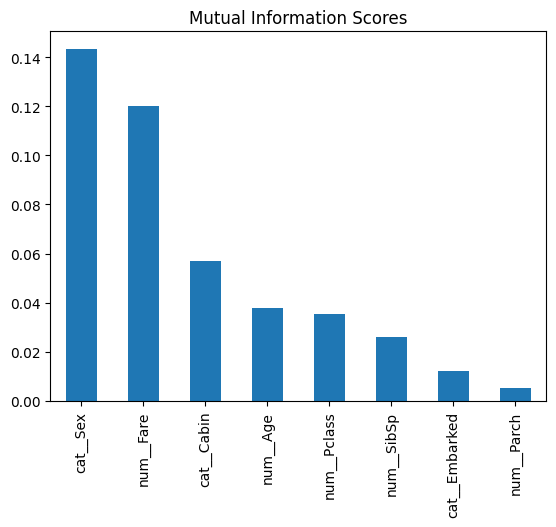

In [25]:
mi.plot(kind= 'bar',title= 'Mutual Information Scores')
# Here according to graph it is clear that 'sibsp' and 'parch' rhese two featuress
# are not much importatnt.

In [26]:
mi.index

Index(['cat__Sex', 'num__Fare', 'cat__Cabin', 'num__Age', 'num__Pclass',
       'num__SibSp', 'cat__Embarked', 'num__Parch'],
      dtype='object')

In [27]:
# here last 2 features are not much important so we are neglactig that features
sel_cols= list(mi[0:6].index)
sel_cols

['cat__Sex',
 'num__Fare',
 'cat__Cabin',
 'num__Age',
 'num__Pclass',
 'num__SibSp']

In [28]:
# Approach 2 (Method 2) to select select top n features
# Here mutual_info_classif is score function
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel= SelectKBest(mutual_info_classif,k= 5)
sel_features= sel.fit_transform(X_pre,y)


In [29]:
sel_cols= sel.get_feature_names_out()
sel_cols

array(['num__Pclass', 'num__SibSp', 'num__Fare', 'cat__Sex', 'cat__Cabin'],
      dtype=object)

In [30]:
sel_cols[2].split('__')[1]
# 0--> Pclass
# 1--> Age
# 2--> Fare

'Fare'

In [31]:
imp_cols= []
for i in sel_cols:
    s= i.split('__')[1]
    imp_cols.append(s)

In [32]:
imp_cols

['Pclass', 'SibSp', 'Fare', 'Sex', 'Cabin']

In [33]:
x_sel = x[imp_cols]

In [34]:
x_sel

,Pclass,SibSp,Fare,Sex,Cabin
0,3,1,7.2500,male,NaN
1,1,1,71.2833,female,C85
2,3,0,7.9250,female,NaN
3,1,1,53.1000,female,C123
4,3,0,8.0500,male,NaN
...,...,...,...,...,...
886,2,0,13.0000,male,NaN
887,1,0,30.0000,female,B42
888,3,1,23.4500,female,NaN
889,1,0,30.0000,male,C148


In [35]:
## Cat , con for Selected features
cat_sel = list(x_sel.columns[x_sel.dtypes=='object'])
con_sel = list(x_sel.columns[x_sel.dtypes!='object'])

In [36]:
cat_sel

['Sex', 'Cabin']

In [37]:
con_sel

['Pclass', 'SibSp', 'Fare']

### Create a final Pipeline

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num',num_pipe2, con_sel),
                          ('cat',cat_pipe2, cat_sel)])

In [40]:
X_sel_pre = pre2.fit_transform(x_sel).toarray()
X_sel_pre

array([[ 0.82737724,  0.43279337, -0.50244517, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.43279337,  0.78684529, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.4745452 , -0.48885426, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724,  0.43279337, -0.17626324, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.4745452 , -0.04438104, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.4745452 , -0.49237783, ...,  0.        ,
         0.        ,  1.        ]])

In [41]:
final_cols= pre2.get_feature_names_out()
final_cols

array(['num__Pclass', 'num__SibSp', 'num__Fare', 'cat__Sex_female',
       'cat__Sex_male', 'cat__Cabin_A10', 'cat__Cabin_A14',
       'cat__Cabin_A16', 'cat__Cabin_A19', 'cat__Cabin_A20',
       'cat__Cabin_A23', 'cat__Cabin_A24', 'cat__Cabin_A26',
       'cat__Cabin_A31', 'cat__Cabin_A32', 'cat__Cabin_A34',
       'cat__Cabin_A36', 'cat__Cabin_A5', 'cat__Cabin_A6',
       'cat__Cabin_A7', 'cat__Cabin_B101', 'cat__Cabin_B102',
       'cat__Cabin_B18', 'cat__Cabin_B19', 'cat__Cabin_B20',
       'cat__Cabin_B22', 'cat__Cabin_B28', 'cat__Cabin_B3',
       'cat__Cabin_B30', 'cat__Cabin_B35', 'cat__Cabin_B37',
       'cat__Cabin_B38', 'cat__Cabin_B39', 'cat__Cabin_B4',
       'cat__Cabin_B41', 'cat__Cabin_B42', 'cat__Cabin_B49',
       'cat__Cabin_B5', 'cat__Cabin_B50', 'cat__Cabin_B51 B53 B55',
       'cat__Cabin_B57 B59 B63 B66', 'cat__Cabin_B58 B60',
       'cat__Cabin_B69', 'cat__Cabin_B71', 'cat__Cabin_B73',
       'cat__Cabin_B77', 'cat__Cabin_B78', 'cat__Cabin_B79',
       'cat__Cab

In [42]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre.head()

,num__Pclass,num__SibSp,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,cat__Cabin_A20,...,cat__Cabin_F E69,cat__Cabin_F G63,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown
0,0.827377,0.432793,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.566107,0.432793,0.786845,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.827377,-0.474545,-0.488854,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.432793,0.420730,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.827377,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, y, test_size=0.2, random_state=41)

### Create a final model on Gradient Boost classifie

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=41,)
gbc.fit(xtrain, ytrain)

GradientBoostingClassifier(random_state=41)

In [45]:
# Check accuracy in training
gbc.score(xtrain, ytrain)

0.875

In [46]:
# Check accuracy in testing
gbc.score(xtest, ytest)

0.8268156424581006

### Perform Hyperparameter tuning

1. GridSearchCV (Slower)
2. RandomizedSearchCV (Faster)

In [47]:
params= {'learning_rate': [0.01,0.05,0.1,0.2],
         'max_depth':[2,3,4,5,6,7,8],
         'min_samples_split':[2,3,4,5,6,7,8,9,10]}

In [48]:
from sklearn.model_selection import RandomizedSearchCV
base_gbc= GradientBoostingClassifier(random_state= 41)
rscv= RandomizedSearchCV(base_gbc,param_distributions=params, cv=5, scoring= 'f1', random_state=41)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=41),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]},
                   random_state=41, scoring='f1')

In [49]:
rscv.best_params_

{'min_samples_split': 10, 'max_depth': 3, 'learning_rate': 0.1}

In [50]:
rscv.best_score_

0.7060972183759135

In [51]:
best_gbc= rscv.best_estimator_
best_gbc

GradientBoostingClassifier(min_samples_split=10, random_state=41)

### Evaluate Model

In [52]:
best_gbc.score(xtrain,ytrain)

0.875

In [53]:
best_gbc.score(xtest,ytest)

0.8268156424581006

In [54]:
# Here we are not getting a best score then to predict the data either we can use a base model   
#  or we can use another algorithm or we can use grid searchCV instaed of Randomizes Search CV also.
# and check wheather the results (score) is improving or not. 
# and if reults are improving then use that model.

In [55]:
# Here we are using a bast_gbc model to predict the data.
ypred_tr= best_gbc.predict(xtrain)
ypred_ts= best_gbc.predict(xtest)


In [56]:
ypred_tr[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [57]:
ypred_ts[0:5]

array([0, 0, 1, 0, 1], dtype=int64)

### Confusion Matrix

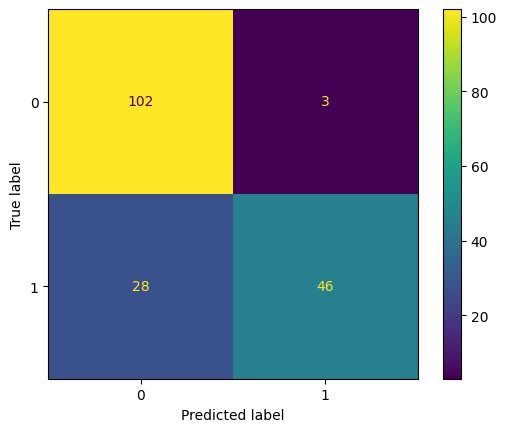

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=gbc.classes_)
cfd.plot()

### Classification Report

In [59]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       105
           1       0.94      0.62      0.75        74

    accuracy                           0.83       179
   macro avg       0.86      0.80      0.81       179
weighted avg       0.85      0.83      0.82       179



### Selected the model for final predictions

### Perform predictions on test_titanic.csv


In [60]:
xnew= pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [62]:
xnew.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [63]:
xnew_pre= pre2.transform(xnew)
xnew_pre

<418x153 sparse matrix of type '<class 'numpy.float64'>'
	with 2044 stored elements in Compressed Sparse Row format>

In [64]:
xnew_pre= pre2.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724, -0.4745452 , -0.49078316, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  0.43279337, -0.50747884, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484, -0.4745452 , -0.45336687, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.4745452 , -0.50244517, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.4745452 , -0.48633742, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  0.43279337, -0.19824428, ...,  0.        ,
         0.        ,  1.        ]])

In [65]:
xnew_pre = pd.DataFrame(xnew_pre, columns=final_cols)
xnew_pre

,num__Pclass,num__SibSp,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,cat__Cabin_A20,...,cat__Cabin_F E69,cat__Cabin_F G63,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown
0,0.827377,-0.474545,-0.490783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.827377,0.432793,-0.507479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.369365,-0.474545,-0.453367,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.827377,-0.474545,-0.474005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,0.432793,-0.401017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.827377,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,-1.566107,-0.474545,1.544246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.827377,-0.474545,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,0.827377,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Perform predictios

In [66]:
preds= best_gbc.predict(xnew_pre)
preds[0:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [67]:
prob = best_gbc.predict_proba(xnew_pre)[:,1]
prob[0:10]

array([0.10204922, 0.81580302, 0.1419569 , 0.1419569 , 0.47669098,
       0.1419569 , 0.61549495, 0.25080309, 0.78164504, 0.18660234])

### Save this values in dataframe

In [68]:
df_results = xnew[['PassengerId']]
df_results

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [69]:
df_results['Survived']=preds
df_results['Probability']=prob

In [70]:
df_results

,PassengerId,Survived,Probability
0,892,0,0.102049
1,893,1,0.815803
2,894,0,0.141957
3,895,0,0.141957
4,896,0,0.476691
...,...,...,...
413,1305,0,0.141957
414,1306,1,0.929197
415,1307,0,0.114981
416,1308,0,0.141957


In [71]:
df_results['Survived'].value_counts()

Survived
0    295
1    123
Name: count, dtype: int64

<Axes: xlabel='Survived'>

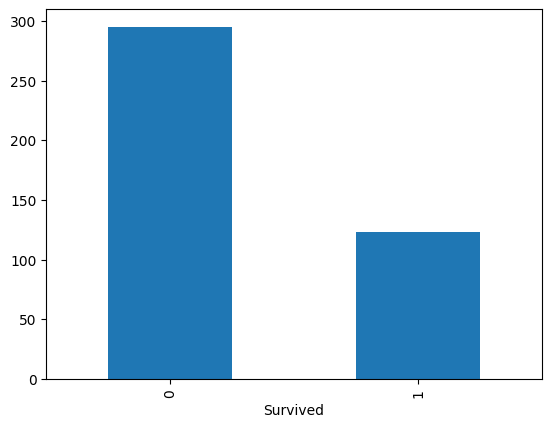

In [72]:
df_results['Survived'].value_counts().plot(kind='bar')

In [73]:
df_results.to_csv('Result.csv',index=False)